**Store Sales : Time Series using ARIMA model**



In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#load the dataset
df_t = pd.read_csv("train.csv")
df_h = pd.read_csv("holidays_events.csv")
df_o = pd.read_csv("oil.csv")
df_s = pd.read_csv("stores.csv")


In [3]:
#merge all provided dataset
df = pd.merge(df_t, df_h, on = "date", how = "left")
df = pd.merge(df, df_o, on = "date", how = "left")
df = pd.merge(df, df_s, on = "store_nbr", how = "left")

In [4]:
df.head(10)

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
5,5,2013-01-01,1,BREAD/BAKERY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
6,6,2013-01-01,1,CELEBRATION,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
7,7,2013-01-01,1,CLEANING,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
8,8,2013-01-01,1,DAIRY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13
9,9,2013-01-01,1,DELI,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13


In [5]:
df.describe()

,id,store_nbr,sales,onpromotion,dcoilwtico,cluster
count,3.054348e+06,3.054348e+06,3.054348e+06,3.054348e+06,2.099196e+06,3.054348e+06
mean,1.504277e+06,2.750000e+01,3.590209e+02,2.617480e+00,6.801587e+01,8.481481e+00
std,8.662610e+05,1.558579e+01,1.107286e+03,1.225494e+01,2.569134e+01,4.649735e+00
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2.619000e+01,1.000000e+00
25%,7.546768e+05,1.400000e+01,0.000000e+00,0.000000e+00,4.641000e+01,4.000000e+00
50%,1.507572e+06,2.750000e+01,1.100000e+01,0.000000e+00,5.343000e+01,8.500000e+00
75%,2.255120e+06,4.100000e+01,1.960110e+02,0.000000e+00,9.581000e+01,1.300000e+01
max,3.000887e+06,5.400000e+01,1.247170e+05,7.410000e+02,1.106200e+02,1.700000e+01


In [6]:
import datetime as dt

#creating the datetime type column using string value from date column
df["timestamp"] = pd.to_datetime(df["date"])

In [7]:
df["year"] = df["timestamp"].dt.year
df["year"].value_counts()

2016    670032
2014    659340
2013    657558
2015    655776
2017    411642
Name: year, dtype: int64

# Data Analysis

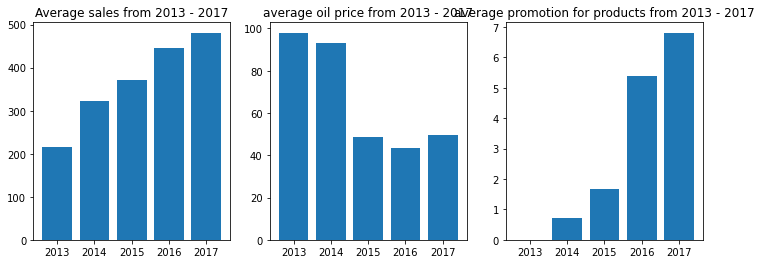

In [8]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

grouped_year = df.groupby("year")
grouped_year_sales = grouped_year["sales"].mean()
axes[0].bar(grouped_year_sales.index, grouped_year_sales)
axes[0].set_title("Average sales from 2013 - 2017")

grouped_year_oil = grouped_year["dcoilwtico"].mean()
axes[1].bar(grouped_year_oil.index, grouped_year_oil)
axes[1].set_title("average oil price from 2013 - 2017")

grouped_year_promotion = grouped_year["onpromotion"].mean()
axes[2].bar(grouped_year_promotion.index, grouped_year_promotion)
axes[2].set_title("average promotion for products from 2013 - 2017")
plt.show()

**Average sales**
From the chart it is clear there is an increasing trend in average sales from 2013 to 2017

**Average oil price**
The oil price in 2013 and 2014 is above 90 but after 2014 the price of the oil falls to 50. The decrease in the oil price may have influenced the number of sales

**Average promotion of product**
There is no investment in promotion in the year 2013. From the 2014 to 2017 we can observe there is a steady increase in promotion of products 



In [9]:
df["month"] = df["timestamp"].dt.strftime("%B")
month_order = ["January", "February", "March", "April", "May", "June", 
               "July", "August", "September", "October", "November", "December"]
df["month"] = pd.Categorical(df["month"], categories=month_order, ordered=True)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


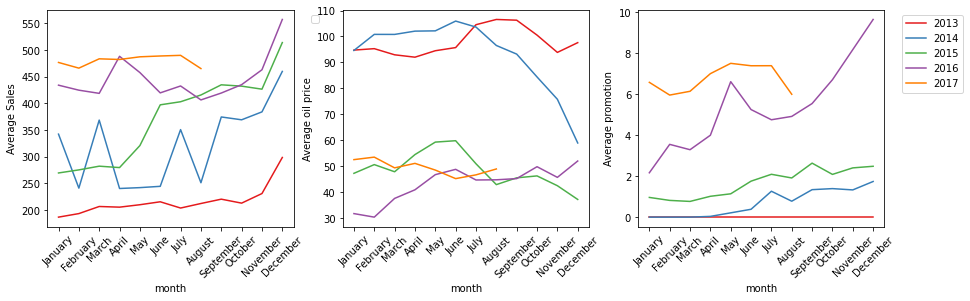

In [10]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

grouped_month_sales = df.groupby(["year", "month"])["sales"].mean().reset_index()
sns.lineplot(x = "month", y = "sales", hue = "year", data = grouped_month_sales, palette="Set1", ax=axes[0], legend = False)
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylabel('Average Sales')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

grouped_month_oil = df.groupby(["year", "month"])["dcoilwtico"].mean().reset_index()
grouped_month_oil["dcoilwtico"] = grouped_month_oil["dcoilwtico"].astype(float)
sns.lineplot(x = "month", y = "dcoilwtico", hue = "year", data = grouped_month_oil, palette="Set1", ax=axes[1], legend = False)
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylabel('Average oil price')

grouped_month_promotion = df.groupby(["year", "month"])["onpromotion"].mean().reset_index()
sns.lineplot(x = "month", y = "onpromotion", hue = "year", data = grouped_month_promotion, palette="Set1", ax=axes[2])
axes[2].tick_params(axis='x', rotation=45)
axes[2].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
axes[2].set_ylabel('Average promotion')

plt.show()


**Average sales in months**
It is clear from the line chart there is a sudden increase in sales during November and December may be due to festivals.

**Average oil price in months**
There is no clear trend in oil price when compared to different months.

**Average promotion of products in months**
from the chart it is clear there is substantial increase in promotion in every consecutive year. Mostly there is an increasing trend in promotion over the last 4 months of the year.

****

In [11]:
state_group = df.groupby(["state"])
state_price = state_group["sales"].mean()
state_oil = state_group["dcoilwtico"].mean()
state_promotion = state_group["onpromotion"].mean()

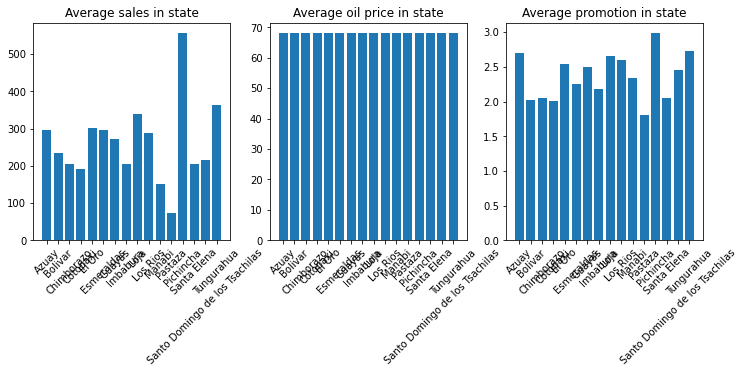

In [12]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].bar(state_price.index, state_price)
axes[0].set_title("Average sales in state")
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(state_oil.index, state_oil)
axes[1].set_title("Average oil price in state")
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(state_promotion.index, state_promotion)
axes[2].set_title("Average promotion in state")
axes[2].tick_params(axis='x', rotation=45)

plt.show()

**Sales and promotion in states**
The Pichincha state has the highest average sales and promotion when compared to other states. The Manabi state has average sales less than 100 and the promotion for that states is less when compared to other states.

**oil price in states**
The oil price is same in all states

In [13]:
city_group = df.groupby(["city"])
city_price = city_group["sales"].mean()
city_oil = city_group["dcoilwtico"].mean()
city_promotion = city_group["onpromotion"].mean()

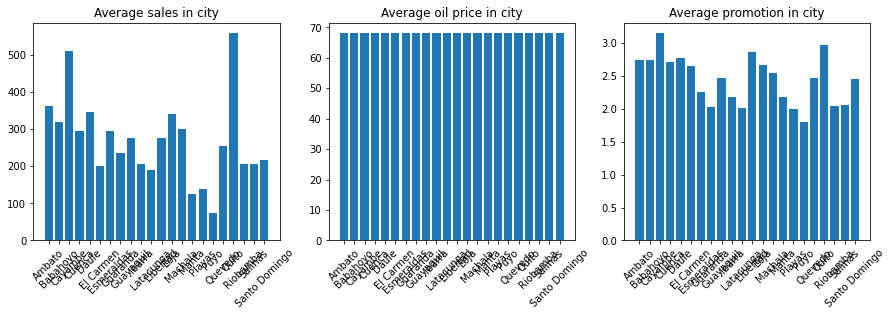

In [14]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

axes[0].bar(city_price.index, city_price)
axes[0].set_title("Average sales in city")
axes[0].tick_params(axis='x', rotation=45)

axes[1].bar(city_oil.index, city_oil)
axes[1].set_title("Average oil price in city")
axes[1].tick_params(axis='x', rotation=45)

axes[2].bar(city_promotion.index, city_promotion)
axes[2].set_title("Average promotion in city")
axes[2].tick_params(axis='x', rotation=45)

plt.show()

**Sales and promotion in cities**
The playas city has the lowest sales and promotion and the Quevedo state has the highest average sales of above 500.

In [15]:
df.head()

,id,date,store_nbr,family,sales,onpromotion,type_x,locale,locale_name,description,transferred,dcoilwtico,city,state,type_y,cluster,timestamp,year,month
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,2013-01-01,2013,January
1,1,2013-01-01,1,BABY CARE,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,2013-01-01,2013,January
2,2,2013-01-01,1,BEAUTY,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,2013-01-01,2013,January
3,3,2013-01-01,1,BEVERAGES,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,2013-01-01,2013,January
4,4,2013-01-01,1,BOOKS,0.0,0,Holiday,National,Ecuador,Primer dia del ano,False,NaN,Quito,Pichincha,D,13,2013-01-01,2013,January


In [16]:
grouped_data = df.groupby("timestamp")
time_series = grouped_data[["sales", "dcoilwtico"]].mean().reset_index()
time_series_copy = time_series.set_index("timestamp")

# TIME SERIES ARIMA model

To fit an ARIMA model the data should be weakly stationary

**The properties of weakly stationary model** 
* The mean of the time series does not change over time
* The time series has a constant variance at each point
* There should be no seasonality or trend in the data


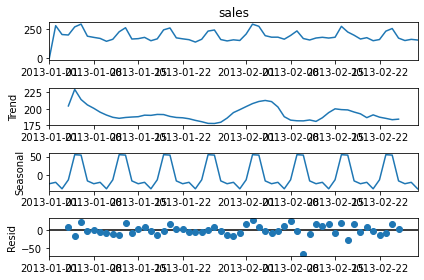

In [17]:
import matplotlib.dates as mdates
import statsmodels.api as sm
import matplotlib
sales_data = time_series_copy["sales"].asfreq("D")
sales_data = sales_data.fillna(method="ffill")
decomposition = sm.tsa.seasonal_decompose(sales_data["2013-01-01": "2013-02-28"], model = "additive")
fig = decomposition.plot()
plt.show()

**Seasonality**
we can clearly see there is a seasonal trend in the data based on every week to make the data weakly stationary we should remove this seasonal trend in the data

**Residuals**
The residuals are not independent and it shows some seasonality. 

Observing seasonality and residuals plot it is clear the process is not weakly stationary.

Text(0, 0.5, 'Average sales')

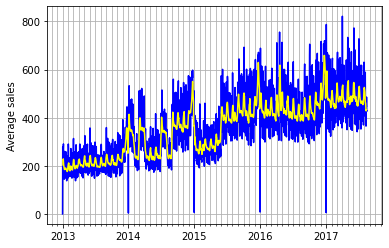

In [18]:
decomposition = sm.tsa.seasonal_decompose(sales_data, model = "additive")
fig, ax = plt.subplots()
ax.grid(True)

year = mdates.YearLocator(month = 1)
month = mdates.MonthLocator(interval = 1)

year_format = mdates.DateFormatter("%Y")
month_format = mdates.DateFormatter("%m")

ax.xaxis.set_minor_locator(month)
ax.xaxis.grid(True, which = "minor")
ax.xaxis.set_major_locator(year)
ax.xaxis.set_major_formatter(year_format)

plt.plot(sales_data.index, sales_data, c = "blue")
plt.plot(decomposition.trend.index, decomposition.trend, c = "yellow")
plt.ylabel("Average sales")

**Trend**
It is clear from the chart there is an increasing trend in the sales data. Therefore the process is not weakly stationary we should remove this increasing trend to make the data weakly stationary.

Text(0.5, 1.0, 'Autocorrelation Function (ACF)')

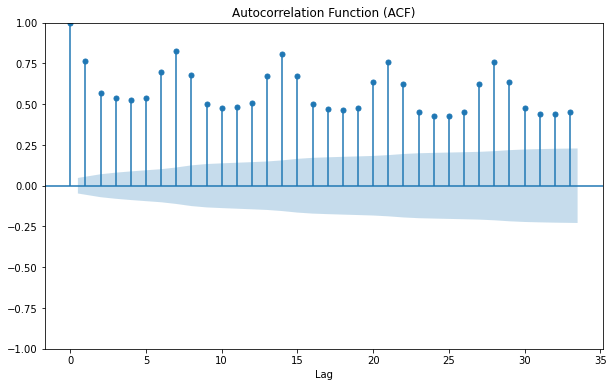

In [19]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(sales_data, ax=ax)
plt.xlabel('Lag')
plt.title('Autocorrelation Function (ACF)')

**To understand what is Lag**
* Let consider current date is 05-01-2013
* Lag1 - 04-01-2013
* Lag2 - 03-01-2013
* Lag3 - 02-01-2013 and so on.
* Mostly the lags which are near contribute more and it is natural. for ex: Today stock price mostly depend on previous day stock price.

**Autocorrelation function plot**

The blue shade represents the confidence interval of 95%. If the acf spike within that shade it means the ceratin lag has no influence or correlation. The confidence limit range between (-2/sqrt(n), 2/sqrt(n)) where n is number of time interval. 

The ACF spikes does not decrease over a period of time and it shows some seasonal pattern. Therefore, if we want to fit ARMA model the number of lag we have to consider is more and it will be very complex to fit the model. Therefore we have to try and make the data weakly stationary



In [20]:
diff_sales = sales_data.diff(1)
diff_sales = diff_sales.dropna()

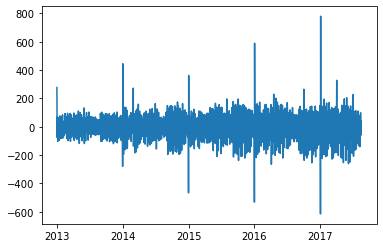

In [21]:
plt.plot(diff_sales.index, diff_sales)

Let Xt is today sales data then Xt-1 is the previous day sales data.
To make the data stationary we tried the first-order difference
The new time series data can be Yt

Yt = Xt - (Xt-1)

**Observation**
we can observe the mean doesn't change over time and the variance is constant. 
There is no trend and seasonality in the data.
However we will check the ACF plot to check whether the process is weakly stationary or not.

In [22]:
from statsmodels.tsa.stattools import adfuller

adfuller_test = adfuller(diff_sales)
print('ADF Statistic: %f' % adfuller_test[0])
print('p-value: ' , adfuller_test[1])
print('Critical Values:')
for key, value in adfuller_test[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -11.351129
p-value:  9.988955399782756e-21
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


**Augmented Dickey-Fuller (ADF) Test**: The ADF test is widely used to test for the presence of a unit root in a time series.

H0 (Null Hypothesis) : The Time series is not weakly stationary

H1 (Alternate Hypothesis) : The Time series is weakly stationary

More the negative value more the data is weakly stationary

The p-value is less than (0.05) 95% significance level. Therefore, according to ADF test the time series is weakly stationary. However we will check with ACF plot whether the time series is weakly stationary or not.


Text(0.5, 1.0, 'Autocorrelation Function (ACF)')

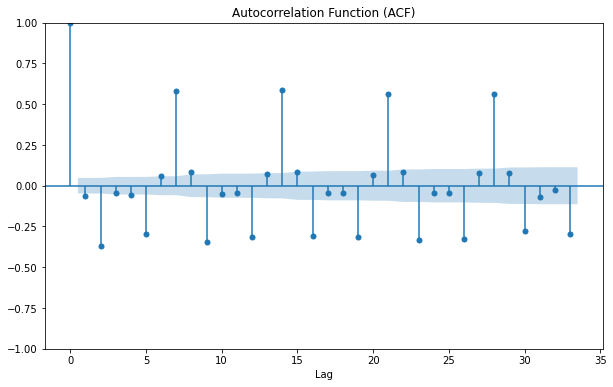

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(diff_sales, ax=ax)
plt.xlabel('Lag')
plt.title('Autocorrelation Function (ACF)')

**Autocorrelation function plot for Yt**
The spike does not falls to zero over a period of lag and we can observe seasonal pattern for every 7 days. Therefore the process is not stationary.

In [24]:
diff_sales_seasonal = diff_sales.diff(7)
diff_sales_seasonal = diff_sales_seasonal.dropna()

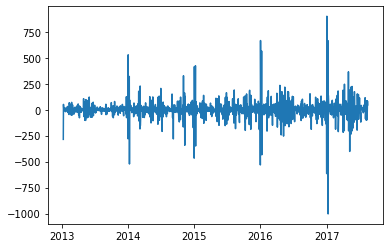

In [25]:
plt.plot(diff_sales_seasonal.index, diff_sales_seasonal)

To remove the seasonal pattern we differenced the Yt time series over a period of 7.

Zt = Yt - (Yt-7)

In [26]:
from statsmodels.tsa.stattools import adfuller

adfuller_test = adfuller(diff_sales_seasonal)
print('ADF Statistic: %f' % adfuller_test[0])
print('p-value: ' , adfuller_test[1])
print('Critical Values:')
for key, value in adfuller_test[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -15.445665
p-value:  2.8271302252361033e-28
Critical Values:
	1%: -3.434
	5%: -2.863
	10%: -2.568


**Augmented Dickey-Fuller (ADF) Test**: The ADF test is widely used to test for the presence of a unit root in a time series.

H0 (Null Hypothesis) : The Time series is not weakly stationary

H1 (Alternate Hypothesis) : The Time series is weakly stationary

The ADF statistics value is -51.4 which is less than -11.3 Therefore Zt is more weakly stationary when compared to first order differenced data Yt.

The p-value is less than 0.05 Therefore the time series is weakly stationary and the Null Hypothesis is rejected.

Text(0.5, 1.0, 'Autocorrelation Function (ACF)')

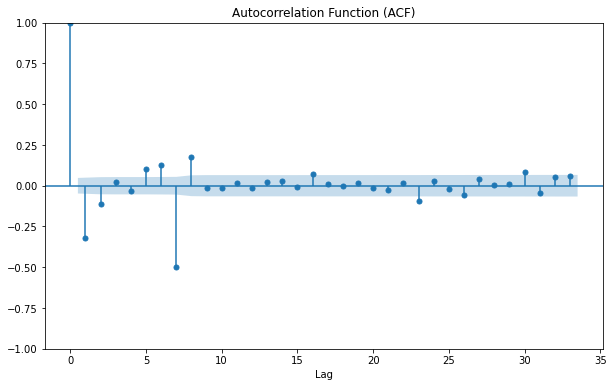

In [27]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(diff_sales_seasonal, ax=ax)
plt.xlabel('Lag')
plt.title('Autocorrelation Function (ACF)')

**Autocorrelation function plot**
The ACF plot shows the spike falls to zero over a period of lags. Therefore, we confirm that the time series Zt is weakly stationary.

The considerable amount of spike till 6 lags indicates the sales price mostly depend upon last 6 days sales and it may be a Moving Average (MA) component.
The lag 3 and lag 4 has no contribution as it falls within confidence interval.

Text(0.5, 1.0, 'Partial Autocorrelation Function (ACF)')

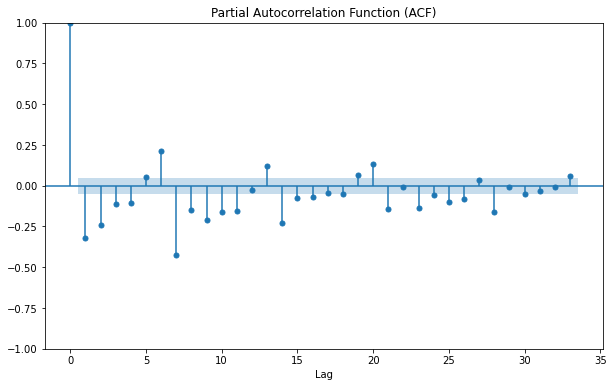

In [28]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_pacf(diff_sales_seasonal, ax=ax, method='ywm')
plt.xlabel('Lag')
plt.title('Partial Autocorrelation Function (ACF)')

**Partial Autocorrelation Function plot**
The PACF seems to decrease gradually over a period of time. This indicates there is no non-seasonal Auto Regressive (AR) component. However the spike at lag 7, 14, 21 indicates there is seasonal Auto Regressive (AR) components.

# ARMA (0, 1, 6) X (3, 1, 0) period 7 model

* p - non seasonal AR component -> zero
* d - difference -> 1 (First order difference)
* q - non seasonal MA component -> 6
* P - seasonal AR component -> 3
* D - period difference -> 1
* Q - seasonal MA component -> 0
* S - Period -> 7

In [29]:
p = 0
d = 1
q = 6
P = 3
D = 1
Q = 0
S=7
model = sm.tsa.ARIMA(sales_data, order=(p, d, q), seasonal_order=(P, D, Q, S))
result = model.fit()
print(result.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            sales   No. Observations:                 1688
Model:             ARIMA(0, 1, 6)x(3, 1, [], 7)   Log Likelihood               -9157.100
Date:                          Thu, 15 Jun 2023   AIC                          18334.201
Time:                                  14:25:42   BIC                          18388.466
Sample:                              01-01-2013   HQIC                         18354.302
                                   - 08-15-2017                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5994      0.053    -11.236      0.000      -0.704      -0.495
ma.L2         -0.1835      0.027     -6.722      0.

We have to fit an parsimonious model (simple model which is not complex). Therefore we can remove the MA or AR component which has less significance.

**H0 (Null hypothesis)** : parameter value = 0

**H1 (Alternate hypothesis)** : parameter value != 0

we reject Null hypothesis when modulas(parameter_value/std err(parameter_value)) > 2

for eg: Test Statistics : 

ma.L2 => mod(-0.1835/ 0.027) = 6.79 > 2 Therefore Null hypothesis is rejected. we include this term
ma.L3 => mod(-0.0203/ 0.027) = 0.75 < 2 Therefore Null hypothesis is not rejected. we do not include this term

Therefore using this test statistics ma.L3, ma.L4, ma.L5, ma.L6 components were removed.

we fit the new ARIMA model with q tems as 2




# ARMA (0, 1, 2) X (3, 1, 0) period 7 model

* p - non seasonal AR component -> zero
* d - difference -> 1 (First order difference)
* q - non seasonal MA component -> 2
* P - seasonal AR component -> 3
* D - period difference -> 1
* Q - seasonal MA component -> 0
* S - Period -> 7

In [30]:
p = 0
d = 1
q = 2
P = 3
D = 1
Q = 0
S=7
model = sm.tsa.ARIMA(sales_data, order=(p, d, q), seasonal_order=(P, D, Q, S))
result = model.fit()
print(result.summary())

                                    SARIMAX Results                                     
Dep. Variable:                            sales   No. Observations:                 1688
Model:             ARIMA(0, 1, 2)x(3, 1, [], 7)   Log Likelihood               -9185.659
Date:                          Thu, 15 Jun 2023   AIC                          18383.318
Time:                                  14:25:44   BIC                          18415.877
Sample:                              01-01-2013   HQIC                         18395.379
                                   - 08-15-2017                                         
Covariance Type:                            opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5307      0.008    -67.304      0.000      -0.546      -0.515
ma.L2         -0.1931      0.018    -10.596      0.

**Residuals plot**

The mean of the residual is zero and residuals are independent. Therefore the model is a good fit.

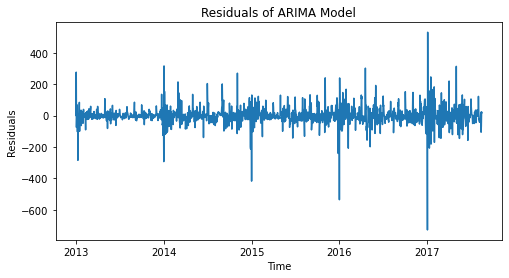

In [31]:
residuals = result.resid
plt.figure(figsize=(8, 4))
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.show()

**Residuals ACF**
Most of the spike were within confidence interval shows they have no correlation. Therefore the model is good fit. 

Text(0.5, 1.0, 'Autocorrelation Function (ACF) for Residuals')

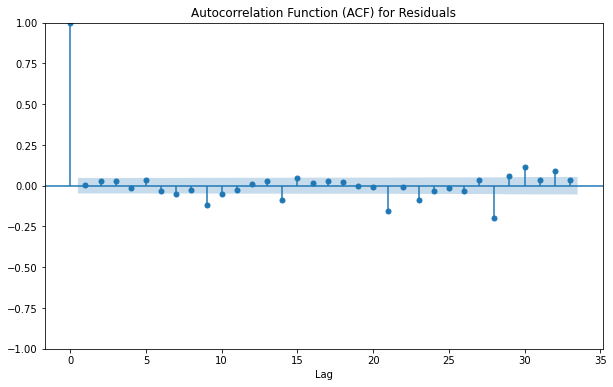

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))
plot_acf(residuals, ax=ax)
plt.xlabel('Lag')
plt.title('Autocorrelation Function (ACF) for Residuals')

**Fitted ARIMA model visualiation**
From the chart the actual and fitted value of the model is mostly similar. Hence the model is a good fit.

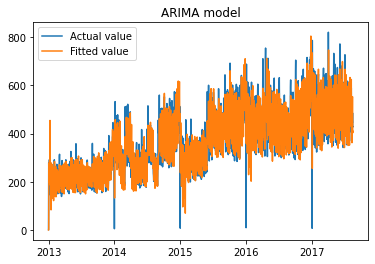

In [33]:
fitted_values = result.predict()
plt.plot(sales_data, label='Actual value')
plt.plot(fitted_values, label='Fitted value')
plt.title("ARIMA model")
plt.legend()
plt.show()

In [34]:
test_data = pd.read_csv("test.csv")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28512 entries, 0 to 28511
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           28512 non-null  int64 
 1   date         28512 non-null  object
 2   store_nbr    28512 non-null  int64 
 3   family       28512 non-null  object
 4   onpromotion  28512 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [35]:
test_data["date"].min()

'2017-08-16'

In [36]:
test_data["date"].max()

'2017-08-31'

In [37]:
prediction = result.predict(start = "2017-08-16", end = "2017-08-31")

In [38]:
prediction = prediction.reset_index()


In [39]:
prediction.columns = ["date", "sales"]

In [40]:
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    16 non-null     datetime64[ns]
 1   sales   16 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 384.0 bytes


In [41]:
test_data["date"] = pd.to_datetime(test_data["date"])

In [42]:
submission = pd.merge(test_data, prediction, on="date", how = "left")

In [43]:
submission = submission[["id", "sales"]]

In [44]:
submission.to_csv('submission.csv', index=False)